### Created by: Rahil Hasan Khan
### The Sparks Foundation
#### Task 2 of Data Science and Business Analytics: Prediction using Unsupervised ML
#### Problem: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing required libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Checking for null values and string

In [23]:
iris_df.isna().value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
False              False             False              False               150
dtype: int64

In [24]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Finding the optimum number of clusters for k-means classification and determining the value of K

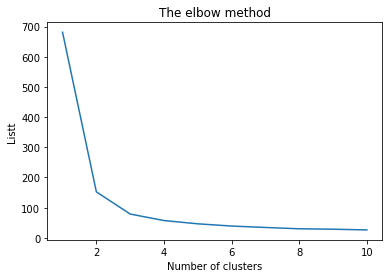

In [25]:
from sklearn.cluster import KMeans

X = iris_df.iloc[:,0:4].values

listt = []

for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 15, random_state = 4)
    k_means.fit(X)
    listt.append(k_means.inertia_)
plt.plot(range(1, 11), listt)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Listt') # Within cluster sum of squares
plt.show()    

### Creating k means classifier by applying kmeans to the dataset for 3 clusters

In [26]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 15, random_state = 4)
y_kmeans = k_means.fit_predict(X)

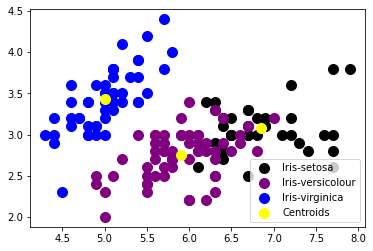

In [27]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'black', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()